AIM: Convolutional neural network (CNN)- Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout

In [2]:
fashion=tf.keras.datasets.fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test)=fashion.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
class_names=["Tshirt","trouser","Pullover","dress","Coat","sandal","Shirt","Sneaker","bag","ankelboot"]

In [7]:
#scaling
x_train=x_train/255.0
x_test=x_test/255.0

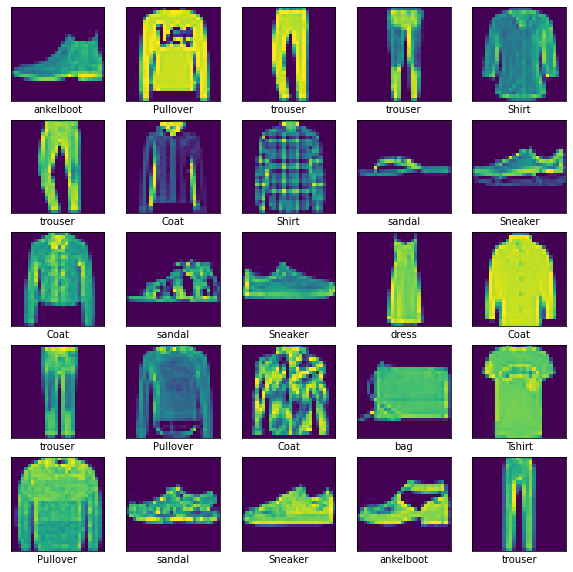

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i]])

In [9]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding="valid",input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [11]:
model.compile(optimizer="adam",loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

In [12]:

model.fit(x_train,y_train,epochs=10,batch_size=256,validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 17s 83ms/step - loss: 0.5415 - accuracy: 0.8148 - val_loss: 0.3829 - val_accuracy: 0.8655
Epoch 2/10
188/188 [==============================] - 15s 80ms/step - loss: 0.3492 - accuracy: 0.8770 - val_loss: 0.3179 - val_accuracy: 0.8892
Epoch 3/10
188/188 [==============================] - 15s 80ms/step - loss: 0.3092 - accuracy: 0.8889 - val_loss: 0.3158 - val_accuracy: 0.8879
Epoch 4/10
188/188 [==============================] - 16s 83ms/step - loss: 0.2873 - accuracy: 0.8965 - val_loss: 0.2917 - val_accuracy: 0.8959
Epoch 5/10
188/188 [==============================] - 16s 85ms/step - loss: 0.2674 - accuracy: 0.9043 - val_loss: 0.2798 - val_accuracy: 0.9022
Epoch 6/10
188/188 [==============================] - 17s 88ms/step - loss: 0.2548 - accuracy: 0.9070 - val_loss: 0.2797 - val_accuracy: 0.9001
Epoch 7/10
188/188 [==============================] - 16s 84ms/step - loss: 0.2411 - accuracy: 0.9117 - val_loss: 0.2586 - val_accuracy:

In [13]:
y_pred=model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [14]:
print(np.argmax(y_pred[0]))
print(y_test[0])

9
9


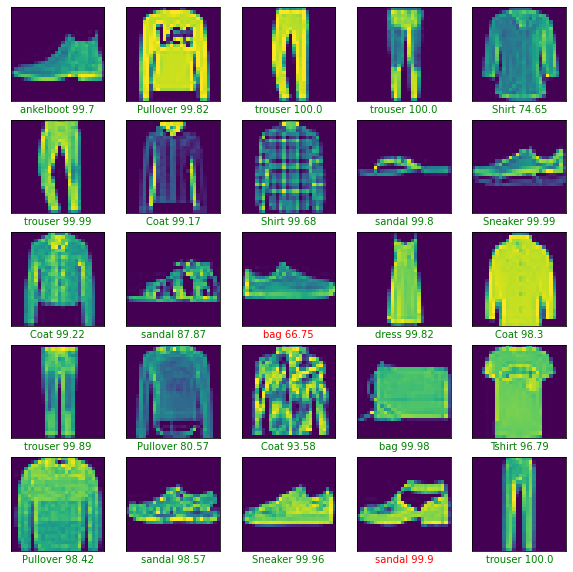

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    if(y_test[i]==(np.argmax(y_pred[i]))):
        color="green"
    else:
        color="red"
    plt.xlabel("{} {}".format(class_names[np.argmax(y_pred[i])],round(100*np.max(y_pred[i]),2)),color=color)
    

In [16]:
l,a=model.evaluate(x_test,y_test)
print(a)

313/313 [==============================] - 2s 8ms/step - loss: 0.2614 - accuracy: 0.9032
0.9031999707221985
